<a href="https://colab.research.google.com/github/RC11-SkillsClass2022-23/KexinGao_Augustine/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np

In [ ]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

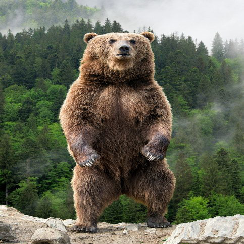

In [ ]:
bear_image_id = os.listdir('/content/drive/MyDrive/RC11 Skill Classes/animals/bear')[0]
bear_path = os.path.join('/content/drive/MyDrive/RC11 Skill Classes/animals/bear', bear_image_id)
bear_image = load_image(bear_path)

tf.keras.preprocessing.image.load_img(bear_path, target_size=(244,244))

In [ ]:
print(f'shape: {bear_image.shape}')
print(f'type: {type(bear_image)}')

shape: (1, 224, 224, 3)
type: <class 'numpy.ndarray'>


In [ ]:
model.predict(bear_image)

1/1 [==============================] - 0s 391ms/step


array([[3.38836834e-08, 6.57557075e-09, 2.30438349e-10, 5.73312453e-10,
        6.14073770e-09, 1.26211119e-09, 4.02848255e-10, 4.33785541e-09,
        1.36064733e-08, 4.11948120e-09, 3.13908699e-09, 3.27212368e-10,
        4.83236340e-10, 7.56559260e-09, 1.27284971e-09, 1.73557335e-09,
        4.89120966e-10, 9.47826928e-10, 1.11013421e-08, 1.05970462e-10,
        3.32613981e-09, 1.18750689e-08, 1.32370648e-08, 1.41847298e-08,
        4.40009735e-08, 6.61031585e-09, 3.35296857e-09, 2.29949371e-09,
        4.67641392e-09, 1.35805134e-09, 1.23424195e-08, 4.72673944e-09,
        1.77237865e-07, 1.90388349e-07, 3.54976066e-08, 8.26970279e-08,
        8.08524163e-08, 3.49347218e-09, 1.27902813e-10, 2.52888963e-08,
        1.09079995e-10, 1.39559153e-09, 2.61633613e-08, 7.26053795e-09,
        1.02688202e-09, 6.94622049e-09, 1.13069754e-09, 2.47953058e-09,
        2.36806144e-07, 7.53111564e-08, 2.28881896e-11, 1.65256486e-09,
        2.08501820e-08, 4.38864362e-10, 4.85851093e-09, 3.006212

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet(
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
model.predict(bear_image).shape

1/1 [==============================] - 0s 358ms/step


(1, 1024)

In [ ]:
x = Dropout(rate=0.4)(model.output)
x = Dense(4)(x)
x = Softmax()(x)
model = Model(model.inputs, x)

In [ ]:
for layer in model.layers[:-3]:
  layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    '/content/drive/MyDrive/RC11 Skill Classes/animals/', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    '/content/drive/MyDrive/RC11 Skill Classes/animals/',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
)

Found 92 images belonging to 4 classes.
Found 8 images belonging to 4 classes.


In [ ]:
batch_size = 8

history = model.fit(
    x=training,
    steps_per_epoch=training.samples // batch_size,
    epochs=2,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

Epoch 1/2
 3/11 [=======>......................] - ETA: 15s - loss: 1.6731

11/11 [==============================] - 9s 511ms/step - loss: 1.6731 - val_loss: 1.2146


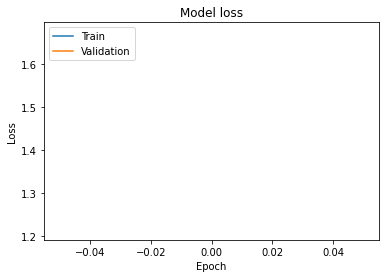

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
random_bear = random.choice(os.listdir('/content/drive/MyDrive/RC11 Skill Classes/animals/bear'))
bear_path = os.path.join('/content/drive/MyDrive/RC11 Skill Classes/animals/bear',random_bear)
bear = load_image(bear_path)
random_wolf = random.choice(os.listdir('/content/drive/MyDrive/RC11 Skill Classes/animals/wolves'))
wolf_path = os.path.join('/content/drive/MyDrive/RC11 Skill Classes/animals/wolves',random_wolf)
wolf = load_image(wolf_path)
random_sparrow = random.choice(os.listdir('/content/drive/MyDrive/RC11 Skill Classes/animals/sparrow'))
sparrow_path = os.path.join('/content/drive/MyDrive/RC11 Skill Classes/animals/sparrow',random_sparrow)
sparrow = load_image(sparrow_path)
random_giraffe = random.choice(os.listdir('/content/drive/MyDrive/RC11 Skill Classes/animals/giraffe'))
giraffe_path = os.path.join('/content/drive/MyDrive/RC11 Skill Classes/animals/giraffe',random_giraffe)
giraffe = load_image(giraffe_path)

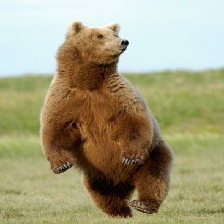

In [ ]:
tf.keras.preprocessing.image.load_img(bear_path, target_size=(224,224))

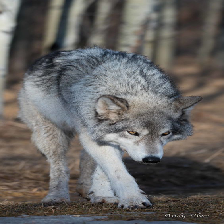

In [ ]:
tf.keras.preprocessing.image.load_img(wolf_path, target_size=(224,224))

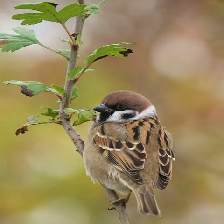

In [ ]:
tf.keras.preprocessing.image.load_img(sparrow_path, target_size=(224,224))

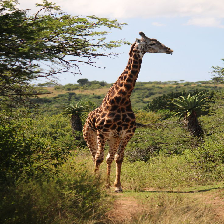

In [ ]:
tf.keras.preprocessing.image.load_img(giraffe_path, target_size=(224,224))

In [ ]:
print(f'''bear:{np.round(model.predict(bear),2)}''')

1/1 [==============================] - 0s 18ms/step
bear:[[0.66 0.01 0.01 0.33]]


In [ ]:
print(f'''wolf:{np.round(model.predict(wolf),2)}''')

1/1 [==============================] - 0s 20ms/step
wolf:[[0.05 0.14 0.17 0.64]]


In [ ]:
print(f'''sparrow:{np.round(model.predict(sparrow),2)}''')

1/1 [==============================] - 0s 17ms/step
sparrow:[[0.01 0.14 0.82 0.03]]


In [ ]:
print(f'''giraffe:{np.round(model.predict(giraffe),2)}''')

1/1 [==============================] - 0s 74ms/step
giraffe:[[0.06 0.52 0.25 0.17]]


In [ ]:
cat_path = '/content/drive/MyDrive/RC11 Skill Classes/cat/01.jpg'
cat = load_image(cat_path)

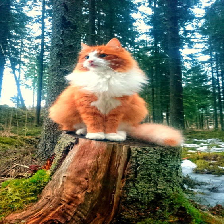

In [ ]:
tf.keras.preprocessing.image.load_img(cat_path, target_size=(224,224))

In [ ]:
print(f'''cat:{np.round(model.predict(cat),2)}''')

1/1 [==============================] - 0s 40ms/step
cat:[[0.03 0.72 0.02 0.23]]
